In [4]:
import pandas as pd
from wsi.utils import processed_data_path


df = pd.read_csv(processed_data_path("womens_safety_index_baseline.csv"))
df = df[df['included_index']]
df.to_csv(processed_data_path("womens_safety_index_baseline_only_incl.csv"), index=False)

In [7]:
df_ = df[['Year', 'WSI (Baseline)', 'Economy']].copy()
df_wide = df_.pivot(index='Year', columns='Economy', values='WSI (Baseline)').reset_index()
df_wide.to_csv(processed_data_path("womens_safety_index_baseline_wide.csv"), index=False)

# plot regional trends

In [2]:
df_ = df[df['Year'].isin([1995, 2024])]
df_['Year'] = df_['Year'].replace({1995: 'Year of 1995', 2024: 'Year of 2024'})
df_.to_csv(processed_data_path("1995_2024_womens_safety_index_baseline.csv"), index=False)

C:\Users\kbuc0011\AppData\Local\Temp\ipykernel_14420\1448807507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Year'] = df_['Year'].replace({1995: 'Year of 1995', 2024: 'Year of 2024'})


In [16]:
df['Region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'Russia & Eurasia', 'East Asia & Pacific', 'North America'],
      dtype=object)

In [15]:
[print(c, ': purple') for c in df_wide.columns]

Year : purple
Afghanistan : purple
Albania : purple
Algeria : purple
Angola : purple
Antigua and Barbuda : purple
Argentina : purple
Armenia : purple
Australia : purple
Austria : purple
Azerbaijan : purple
Bahrain : purple
Bangladesh : purple
Barbados : purple
Belarus : purple
Belgium : purple
Belize : purple
Benin : purple
Bhutan : purple
Bolivia : purple
Bosnia and Herzegovina : purple
Botswana : purple
Brazil : purple
Brunei : purple
Bulgaria : purple
Burkina Faso : purple
Burundi : purple
Cabo Verde : purple
Cambodia : purple
Cameroon : purple
Canada : purple
Central African Republic : purple
Chad : purple
Chile : purple
China : purple
Colombia : purple
Comoros : purple
Costa Rica : purple
Croatia : purple
Cuba : purple
Cyprus : purple
Czechia : purple
Côte d’Ivoire : purple
Democratic Republic of Congo : purple
Denmark : purple
Djibouti : purple
Dominican Republic : purple
Ecuador : purple
Egypt : purple
El Salvador : purple
Equatorial Guinea : purple
Eritrea : purple
Estonia : pu

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [19]:
#df[['Year','WSI (Baseline)', 'Region']]
# 1. Group by Region and Year, take mean of WSI (Baseline)
regional_avg = df.groupby(['Region', 'Year'])['WSI (Baseline)'].mean().reset_index()

# 2. Pivot to wide format: each Region becomes a column
regional_wide = regional_avg.pivot(index='Year', columns='Region', values='WSI (Baseline)')

# 3. (Optional) Reset index if you want 'Year' as a column
regional_wide = regional_wide.reset_index()


In [21]:
regional_wide.to_csv(processed_data_path("regional_avg_wsi_baseline.csv"), index=False)

# add quartiles information

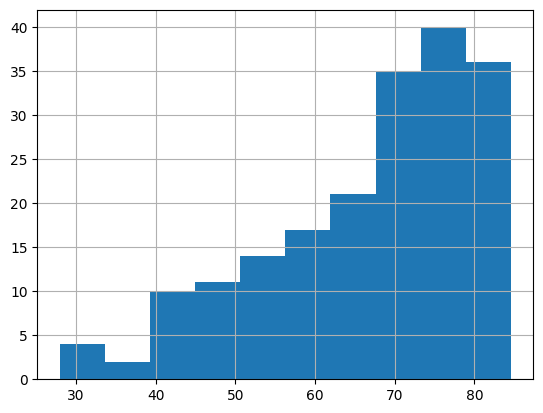

In [2]:
df_2024 = df[(df['Year']==2024)&df['included_index']]
df_2024['WSI (Baseline)'].hist();

In [3]:
def classify_wsi_quartiles(df):
    """
    Adds a column to the DataFrame classifying 'WSI (Baseline)' into quartiles:
    'lowest quartile', 'mid-quartiles', or 'top quartile'.
    """
    # Calculate the quartiles
    q1 = df['WSI (Baseline)'].quantile(0.25)
    q3 = df['WSI (Baseline)'].quantile(0.75)

    def classify(value):
        if value <= q1:
            return 'lowest quartile'
        elif value >= q3:
            return 'top quartile'
        else:
            return 'mid-quartiles'

    df['WSI Quartile'] = df['WSI (Baseline)'].apply(classify)
    return df

df_2024 = classify_wsi_quartiles(df_2024)
print(df_2024[['ISO_code', 'WSI (Baseline)', 'WSI Quartile']].head())

df_2024.to_csv(processed_data_path("2024_wsi_quartiles.csv"))

    ISO_code  WSI (Baseline)     WSI Quartile
29       AFG       40.208487  lowest quartile
59       AGO       52.766870  lowest quartile
89       ALB       74.087432    mid-quartiles
119      ARE       80.209944     top quartile
149      ARG       76.535510    mid-quartiles


C:\Users\kbuc0011\AppData\Local\Temp\ipykernel_30828\8487328.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WSI Quartile'] = df['WSI (Baseline)'].apply(classify)
